# WebScrapping

### Imports utilizados na realização

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_colwidth", None)

## Realização do WebScrapping

### Respetivo código do WebScrapping

### Tratamento dos dados

In [3]:
WebScrapping = pd.read_csv("completa.csv")

In [4]:
WebScrapping

,Unnamed: 0.1,Unnamed: 0,PlayerName,Born,Height,Hand,LinkPlayer,Weight,Birt,Treinador,Rank
0,0,0,Novak Djokovic,"Belgrade, Serbia",(188cm),"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,(77kg),(1987.05.22),Goran Ivanisevic,1
1,1,1,Romain Bogaerts,Namur,(188cm),"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/romain-bogaerts/bk85/player-activity?year=all&matchType=Singles,(76kg),(1993.12.23),Bouhoulle Michel And Tony Bresky,1092
2,2,2,Louis Cant,NaN,NaN,right,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,NaN,(1990.11.08),NaN,1025
3,3,3,Philipp Scholz,NaN,NaN,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/philipp-scholz/su09/player-activity?year=all&matchType=Singles,NaN,(1995.01.24),NaN,841
4,4,4,Thomas Schoorel,"Amsterdam, Netherlands",(203cm),"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/thomas-schoorel/sj63/player-activity?year=all&matchType=Singles,NaN,(1989.04.08),NaN,94
...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,1195,Marious Zelba,NaN,NaN,right,https://www.atptour.com/en/players/marious-zelba/z243/player-activity?year=all&matchType=Singles,NaN,(1990.05.15),NaN,786
1196,1196,1196,Clement Reix,NaN,NaN,right,https://www.atptour.com/en/players/clement-reix/r852/player-activity?year=all&matchType=Singles,NaN,(1983.10.09),NaN,437
1197,1197,1197,Diego Junqueira,"Tandil, Buenos Aires, Argentin",(178cm),"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/diego-junqueira/j214/player-activity?year=all&matchType=Singles,(72kg),(1980.12.28),Walter Grinovero,68
1198,1198,1198,James Chaudry,NaN,NaN,right,https://www.atptour.com/en/players/james-chaudry/cc86/player-activity?year=all&matchType=Singles,NaN,(1991.03.11),NaN,923


In [5]:
WebScrapping = WebScrapping.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)
WebScrapping.head()

,PlayerName,Born,Height,Hand,LinkPlayer,Weight,Birt,Treinador,Rank
0,Novak Djokovic,"Belgrade, Serbia",(188cm),"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,(77kg),(1987.05.22),Goran Ivanisevic,1
1,Romain Bogaerts,Namur,(188cm),"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/romain-bogaerts/bk85/player-activity?year=all&matchType=Singles,(76kg),(1993.12.23),Bouhoulle Michel And Tony Bresky,1092
2,Louis Cant,NaN,NaN,right,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,NaN,(1990.11.08),NaN,1025
3,Philipp Scholz,NaN,NaN,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/philipp-scholz/su09/player-activity?year=all&matchType=Singles,NaN,(1995.01.24),NaN,841
4,Thomas Schoorel,"Amsterdam, Netherlands",(203cm),"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/thomas-schoorel/sj63/player-activity?year=all&matchType=Singles,NaN,(1989.04.08),NaN,94


#### Height

In [6]:
WebScrapping['Height'] = WebScrapping['Height'].apply(lambda x: float(x.strip('(cm)')) if pd.notnull(x) else x)
median_height = WebScrapping['Height'].median()
WebScrapping['Height'].fillna(median_height, inplace=True)

In [7]:
WebScrapping.head()

,PlayerName,Born,Height,Hand,LinkPlayer,Weight,Birt,Treinador,Rank
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,(77kg),(1987.05.22),Goran Ivanisevic,1
1,Romain Bogaerts,Namur,188.0,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/romain-bogaerts/bk85/player-activity?year=all&matchType=Singles,(76kg),(1993.12.23),Bouhoulle Michel And Tony Bresky,1092
2,Louis Cant,NaN,185.0,right,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,NaN,(1990.11.08),NaN,1025
3,Philipp Scholz,NaN,185.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/philipp-scholz/su09/player-activity?year=all&matchType=Singles,NaN,(1995.01.24),NaN,841
4,Thomas Schoorel,"Amsterdam, Netherlands",203.0,"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/thomas-schoorel/sj63/player-activity?year=all&matchType=Singles,NaN,(1989.04.08),NaN,94


#### Hand

In [8]:
WebScrapping["Hand"].unique()

array(['Right-Handed, Two-Handed Backhand',
       'Left-Handed, Two-Handed Backhand', 'right',
       'Left-Handed, Unknown Backhand', 'Right-Handed, Unknown Backhand',
       'Left-Handed, One-Handed Backhand',
       'Ambidextrous, Two-Handed Backhand',
       'Right-Handed, One-Handed Backhand', 'left', nan,
       'Ambidextrous, Unknown Backhand'], dtype=object)

In [9]:
WebScrapping['Hand'] = WebScrapping['Hand'].replace('left', 'Left-Handed')
WebScrapping['Hand'] = WebScrapping['Hand'].replace('right', 'Right-Handed')
# Existe mais destros na base de dados, deve ser o mais comum
WebScrapping['Hand'] = WebScrapping['Hand'].fillna('Right-Handed')

In [10]:
WebScrapping.tail()

,PlayerName,Born,Height,Hand,LinkPlayer,Weight,Birt,Treinador,Rank
1195,Marious Zelba,NaN,185.0,Right-Handed,https://www.atptour.com/en/players/marious-zelba/z243/player-activity?year=all&matchType=Singles,NaN,(1990.05.15),NaN,786
1196,Clement Reix,NaN,185.0,Right-Handed,https://www.atptour.com/en/players/clement-reix/r852/player-activity?year=all&matchType=Singles,NaN,(1983.10.09),NaN,437
1197,Diego Junqueira,"Tandil, Buenos Aires, Argentin",178.0,"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/diego-junqueira/j214/player-activity?year=all&matchType=Singles,(72kg),(1980.12.28),Walter Grinovero,68
1198,James Chaudry,NaN,185.0,Right-Handed,https://www.atptour.com/en/players/james-chaudry/cc86/player-activity?year=all&matchType=Singles,NaN,(1991.03.11),NaN,923
1199,Filipp Smalyanyy,NaN,185.0,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/filipp-smalyanyy/su42/player-activity?year=all&matchType=Singles,NaN,(1995.02.08),NaN,NaN


#### Weight

In [11]:
WebScrapping['Weight'] = WebScrapping['Weight'].apply(lambda x: re.sub(r'\D', '', str(x)))
WebScrapping['Weight'] = pd.to_numeric(WebScrapping['Weight'], errors='coerce')
median = WebScrapping['Weight'].median()
WebScrapping['Weight'].fillna(median, inplace=True)

In [12]:
WebScrapping.head()

,PlayerName,Born,Height,Hand,LinkPlayer,Weight,Birt,Treinador,Rank
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,77.0,(1987.05.22),Goran Ivanisevic,1
1,Romain Bogaerts,Namur,188.0,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/romain-bogaerts/bk85/player-activity?year=all&matchType=Singles,76.0,(1993.12.23),Bouhoulle Michel And Tony Bresky,1092
2,Louis Cant,NaN,185.0,Right-Handed,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,78.0,(1990.11.08),NaN,1025
3,Philipp Scholz,NaN,185.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/philipp-scholz/su09/player-activity?year=all&matchType=Singles,78.0,(1995.01.24),NaN,841
4,Thomas Schoorel,"Amsterdam, Netherlands",203.0,"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/thomas-schoorel/sj63/player-activity?year=all&matchType=Singles,78.0,(1989.04.08),NaN,94


#### Data de Nascimento

In [13]:
WebScrapping['Birt'] = WebScrapping['Birt'].str.replace(r'\(|\)', '', regex=True)
WebScrapping['Birt'] = pd.to_datetime(WebScrapping['Birt'])

In [14]:
WebScrapping.head()

,PlayerName,Born,Height,Hand,LinkPlayer,Weight,Birt,Treinador,Rank
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,77.0,1987-05-22,Goran Ivanisevic,1
1,Romain Bogaerts,Namur,188.0,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/romain-bogaerts/bk85/player-activity?year=all&matchType=Singles,76.0,1993-12-23,Bouhoulle Michel And Tony Bresky,1092
2,Louis Cant,NaN,185.0,Right-Handed,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,78.0,1990-11-08,NaN,1025
3,Philipp Scholz,NaN,185.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/philipp-scholz/su09/player-activity?year=all&matchType=Singles,78.0,1995-01-24,NaN,841
4,Thomas Schoorel,"Amsterdam, Netherlands",203.0,"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/thomas-schoorel/sj63/player-activity?year=all&matchType=Singles,78.0,1989-04-08,NaN,94


#### Valores Omissos

In [15]:
WebScrapping.isnull().sum()

PlayerName      0
Born          328
Height          0
Hand            0
LinkPlayer      0
Weight          0
Birt           16
Treinador     624
Rank          200
dtype: int64

In [16]:
WebScrapping[WebScrapping["Rank"].isnull()]

,PlayerName,Born,Height,Hand,LinkPlayer,Weight,Birt,Treinador,Rank
10,Lofo Ramiaramanana,Toamasina,175.0,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/lofo-ramiaramanana/r964/player-activity?year=all&matchType=Singles,72.0,1989-06-14,NaN,NaN
17,Boris Nicola Bakalov,Muenster,183.0,"Left-Handed, One-Handed Backhand",https://www.atptour.com/en/players/boris-nicola-bakalov/bf34/player-activity?year=all&matchType=Singles,75.0,1980-11-23,NaN,NaN
35,Josh Goodall,"Basingstoke, Great Britain",188.0,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/josh-goodall/g744/player-activity?year=all&matchType=Singles,74.0,1985-10-17,Peter Lundgren,NaN
49,Xavier Malisse,"Kortrijk, Belgium",185.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/xavier-malisse/m680/player-activity?year=all&matchType=Singles,83.0,1980-07-19,NaN,NaN
83,Catalin-Ionut Gard,NaN,185.0,"Right-Handed, One-Handed Backhand",https://www.atptour.com/en/players/catalin-ionut-gard/g493/player-activity?year=all&matchType=Singles,78.0,1981-07-10,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1171,Martin Laurendeau,"Montreal, Quebec, Canada",191.0,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/martin-laurendeau/l008/player-activity?year=all&matchType=Singles,78.0,1964-07-10,Louis Cayer- Allen Fox,NaN
1176,Niels Lootsma,"Groningen, Netherlands",193.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/niels-lootsma/le38/player-activity?year=all&matchType=Singles,78.0,1994-08-15,Martin Simek,NaN
1179,Mubarak Shannan Zayid,NaN,185.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/mubarak-shannan-zayid/ac39/player-activity?year=all&matchType=Singles,78.0,1995-04-14,NaN,NaN
1190,Yannick Staschen,NaN,185.0,Right-Handed,https://www.atptour.com/en/players/yannick-staschen/sq67/player-activity?year=all&matchType=Singles,78.0,1994-09-06,NaN,NaN


##### Webscrapping Extra

In [17]:
Extra = pd.read_csv("jogadores_em_Falta.csv")

In [18]:
Extra.columns

Index(['Unnamed: 0', 'PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer',
       'Weight', 'Birt', 'Treinador', 'Rank'],
      dtype='object')

In [19]:
Extra['Birt'] = Extra['Birt'].str.replace(r'\(|\)', '', regex=True)
Extra['Birt'] = pd.to_datetime(Extra['Birt'])

In [20]:
New = pd.merge(WebScrapping, Extra[['Born', 'Height', 'Hand', 'LinkPlayer', 'Weight', 'Rank', 'Birt']], on="LinkPlayer", how="left")

In [21]:
New

,PlayerName,Born_x,Height_x,Hand_x,LinkPlayer,Weight_x,Birt_x,Treinador,Rank_x,Born_y,Height_y,Hand_y,Weight_y,Rank_y,Birt_y
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,77.0,1987-05-22,Goran Ivanisevic,1,NaN,NaN,NaN,NaN,NaN,NaT
1,Romain Bogaerts,Namur,188.0,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/romain-bogaerts/bk85/player-activity?year=all&matchType=Singles,76.0,1993-12-23,Bouhoulle Michel And Tony Bresky,1092,NaN,NaN,NaN,NaN,NaN,NaT
2,Louis Cant,NaN,185.0,Right-Handed,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,78.0,1990-11-08,NaN,1025,Belgium,185.0,Right-Handed,78.0,1025.0,1990-11-08
3,Philipp Scholz,NaN,185.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/philipp-scholz/su09/player-activity?year=all&matchType=Singles,78.0,1995-01-24,NaN,841,Germany,185.0,"Right-Handed, Two-Handed Backhand",78.0,841.0,1995-01-24
4,Thomas Schoorel,"Amsterdam, Netherlands",203.0,"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/thomas-schoorel/sj63/player-activity?year=all&matchType=Singles,78.0,1989-04-08,NaN,94,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Marious Zelba,NaN,185.0,Right-Handed,https://www.atptour.com/en/players/marious-zelba/z243/player-activity?year=all&matchType=Singles,78.0,1990-05-15,NaN,786,Australia,185.0,Right-Handed,78.0,786.0,1990-05-15
1196,Clement Reix,NaN,185.0,Right-Handed,https://www.atptour.com/en/players/clement-reix/r852/player-activity?year=all&matchType=Singles,78.0,1983-10-09,NaN,437,France,185.0,Right-Handed,78.0,437.0,1983-10-09
1197,Diego Junqueira,"Tandil, Buenos Aires, Argentin",178.0,"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/diego-junqueira/j214/player-activity?year=all&matchType=Singles,72.0,1980-12-28,Walter Grinovero,68,NaN,NaN,NaN,NaN,NaN,NaT
1198,James Chaudry,NaN,185.0,Right-Handed,https://www.atptour.com/en/players/james-chaudry/cc86/player-activity?year=all&matchType=Singles,78.0,1991-03-11,NaN,923,Great Britain,185.0,Right-Handed,78.0,923.0,1991-03-11


In [22]:
# Substitui os valores nulos do dataframe 1 pelos valores correspondentes do dataframe 2
New["Born_x"].fillna(New["Born_y"], inplace=True)
New["Rank_x"].fillna(New["Rank_y"], inplace=True)
New["Hand_x"].fillna(New["Hand_y"], inplace=True)
New["Weight_x"].fillna(New["Weight_y"], inplace=True)
New["Height_x"].fillna(New["Height_y"], inplace=True)
New["Birt_x"].fillna(New["Birt_y"], inplace=True)

# Remove as colunas duplicadas (com sufixo _x e _y) e renomeia as colunas novas
New.drop(columns=['Born_y', 'Height_y', 'Hand_y', 'Weight_y', 'Rank_y', 'Birt_y'], inplace=True)
New.rename(columns={"Born_x": "Born", "Height_x": "Height", "Hand_x": "Hand", "Weight_x":"Weight", "Rank_x":"Rank", "Birt_x":"Birt"}, inplace=True)

In [23]:
New.isnull().sum()

PlayerName      0
Born           21
Height          0
Hand            0
LinkPlayer      0
Weight          0
Birt           16
Treinador     624
Rank          182
dtype: int64

In [24]:
WebScrapping = New
del New

In [25]:
WebScrapping.columns

Index(['PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer', 'Weight', 'Birt',
       'Treinador', 'Rank'],
      dtype='object')

### Oponentes

In [26]:
Oponentes = pd.read_csv("jogadores_full_oponent.csv")

In [27]:
len(Oponentes)

805

In [28]:
Oponentes.head(1)

,Unnamed: 0.1,Unnamed: 0,PlayerName,Born,Height,Hand,LinkPlayer,Weight,Birt,Rank
0,757,757,Zane Khan,USA,NaN,right,NaN,NaN,2002-2-11,838.0


In [29]:
Oponentes['Hand'] = Oponentes['Hand'].replace('left', 'Left-Handed')
Oponentes['Hand'] = Oponentes['Hand'].replace('right', 'Right-Handed')
# Existe mais destros na base de dados, deve ser o mais comum
Oponentes['Hand'] = Oponentes['Hand'].fillna('Right-Handed')

In [30]:
Oponentes = Oponentes.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

In [31]:
Oponentes['Birt'] = Oponentes['Birt'].str.replace(r'\(|\)', '', regex=True)
Oponentes['Birt'] = pd.to_datetime(Oponentes['Birt'])

In [32]:
Oponentes.columns

Index(['PlayerName', 'Born', 'Height', 'Hand', 'LinkPlayer', 'Weight', 'Birt',
       'Rank'],
      dtype='object')

In [33]:
merged_df = pd.concat([WebScrapping, Oponentes])

In [34]:
merged_df = merged_df.reset_index(drop=True)

In [35]:
merged_df

,PlayerName,Born,Height,Hand,LinkPlayer,Weight,Birt,Treinador,Rank
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,77.0,1987-05-22,Goran Ivanisevic,1
1,Romain Bogaerts,Namur,188.0,"Left-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/romain-bogaerts/bk85/player-activity?year=all&matchType=Singles,76.0,1993-12-23,Bouhoulle Michel And Tony Bresky,1092
2,Louis Cant,Belgium,185.0,Right-Handed,https://www.atptour.com/en/players/louis-cant/cd88/player-activity?year=all&matchType=Singles,78.0,1990-11-08,NaN,1025
3,Philipp Scholz,Germany,185.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/philipp-scholz/su09/player-activity?year=all&matchType=Singles,78.0,1995-01-24,NaN,841
4,Thomas Schoorel,"Amsterdam, Netherlands",203.0,"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/thomas-schoorel/sj63/player-activity?year=all&matchType=Singles,78.0,1989-04-08,NaN,94
...,...,...,...,...,...,...,...,...,...
2000,Alexandr Dolgopolov,NaN,NaN,Right-Handed,NaN,NaN,NaT,NaN,NaN
2001,Yannick Hanfmann,Germany,193.0,Right-Handed,NaN,86.0,1991-11-13,NaN,92.0
2002,Alexander Mannapov,Germany,191.0,Right-Handed,NaN,85.0,1995-04-21,NaN,1654.0
2003,Alexander Kotzen,USA,NaN,Right-Handed,NaN,NaN,2000-07-01,NaN,764.0


In [36]:
merged_df.drop("LinkPlayer", axis=1)

,PlayerName,Born,Height,Hand,Weight,Birt,Treinador,Rank
0,Novak Djokovic,"Belgrade, Serbia",188.0,"Right-Handed, Two-Handed Backhand",77.0,1987-05-22,Goran Ivanisevic,1
1,Romain Bogaerts,Namur,188.0,"Left-Handed, Two-Handed Backhand",76.0,1993-12-23,Bouhoulle Michel And Tony Bresky,1092
2,Louis Cant,Belgium,185.0,Right-Handed,78.0,1990-11-08,NaN,1025
3,Philipp Scholz,Germany,185.0,"Right-Handed, Two-Handed Backhand",78.0,1995-01-24,NaN,841
4,Thomas Schoorel,"Amsterdam, Netherlands",203.0,"Left-Handed, Unknown Backhand",78.0,1989-04-08,NaN,94
...,...,...,...,...,...,...,...,...
2000,Alexandr Dolgopolov,NaN,NaN,Right-Handed,NaN,NaT,NaN,NaN
2001,Yannick Hanfmann,Germany,193.0,Right-Handed,86.0,1991-11-13,NaN,92.0
2002,Alexander Mannapov,Germany,191.0,Right-Handed,85.0,1995-04-21,NaN,1654.0
2003,Alexander Kotzen,USA,NaN,Right-Handed,NaN,2000-07-01,NaN,764.0


2000	Alexandr Dolgopolov	NaN	NaN	Right-Handed	NaN	NaT	NaN	NaN

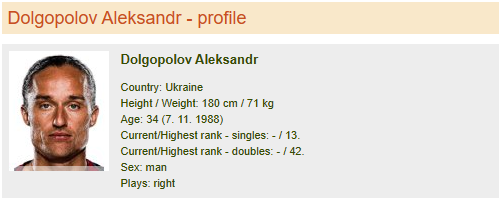

In [37]:
merged_df.isnull().sum()

PlayerName       0
Born           211
Height         594
Hand             0
LinkPlayer     805
Weight         603
Birt           215
Treinador     1429
Rank           533
dtype: int64

In [38]:
merged_df['Rank'].unique()

array(['1', '1092', '1025', ..., 92.0, 1654.0, 764.0], dtype=object)

In [39]:
merged_df['Rank'] = merged_df['Rank'].apply(lambda x: re.sub(r'\D', '', str(x)))
merged_df['Rank'] = pd.to_numeric(merged_df['Rank'])

In [40]:
unique_values = np.unique(merged_df["Rank"])
print(unique_values)

[1.000e+00 2.000e+00 3.000e+00 ... 1.800e+04 1.978e+04       nan]


In [41]:
merged_df[merged_df['Rank']=='1722T']

,PlayerName,Born,Height,Hand,LinkPlayer,Weight,Birt,Treinador,Rank


In [42]:
merged_df['Height']

0       188.0
1       188.0
2       185.0
3       185.0
4       203.0
        ...  
2000      NaN
2001    193.0
2002    191.0
2003      NaN
2004      NaN
Name: Height, Length: 2005, dtype: float64

#### Exportação do Ficheiro

In [43]:
merged_df.isnull().sum()

PlayerName       0
Born           211
Height         594
Hand             0
LinkPlayer     805
Weight         603
Birt           215
Treinador     1429
Rank           533
dtype: int64

In [44]:
WebScrapping.to_csv('merged_df', index = False, encoding='utf-8') # False: not include index

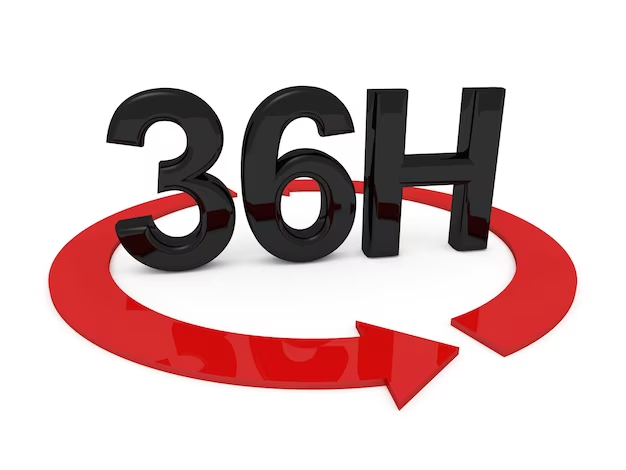

- - -